<a href="https://colab.research.google.com/github/murtihash/Santander-Classification-ANN--Artificial-Neural-Network-/blob/master/Santander_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
df=pd.read_csv('/content/gdrive/My Drive/colab/binary/train.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


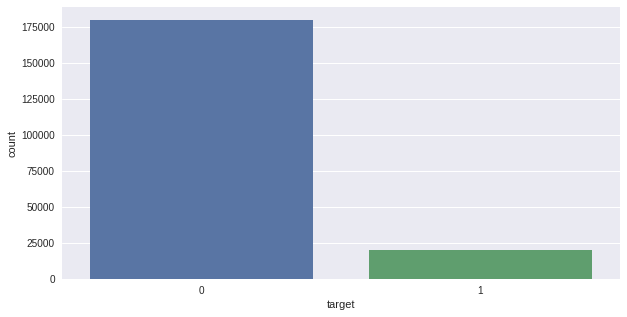

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['target'],)

In [0]:
y=df['target']

In [0]:
X = df.drop(columns=['target','ID_code'],axis=1)

In [10]:
df['target'].value_counts(normalize=True)

0    0.89951
1    0.10049
Name: target, dtype: float64

In [0]:
## Accuracy to beat is 89%

In [0]:
(df.corr()['target'].abs()>.3).value_counts()


False    200
True       1
Name: target, dtype: int64

In [0]:
(df.corr()['target'].abs()>.2).value_counts()

False    200
True       1
Name: target, dtype: int64

In [0]:
## Using pearson correlation for feature selection has not helped us. 
## By using .2 and .3 in either direction
## Features do not show correlation to target variable.
## Will have to employ machine learning for feature selection.
## First lets try getting a base line model using some commonly used ML 

In [0]:
from sklearn.model_selection import GridSearchCV
def best_machine(model, parameters, X1, y1):
    grid =  GridSearchCV(model, parameters, error_score=0.)
    grid.fit(X,y)
    grid.best_score
    grid.best_params



In [0]:
X1 = df.drop(columns=['target','ID_code'],axis=1)

In [0]:
y1 = df['target']

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
lr_parameters= {'C':[1e-1,1e0,1e1,1e2],'penalty':['l1','l2']}
knn_parameters= {'n_neighbors':[1,3,5,7,9]}
forest_parameters= {'n_estimators':[10,50,100],'max depth':[None,1,3,5,7,9]}

In [0]:
lr=LogisticRegression()
knn=KNeighborsClassifier()



In [0]:
best_machine(lr,lr_parameters,X1,y1)

In [0]:
best_machine(knn,knn_parameters,X1,y1)

In [0]:
## 59-60 % were best by simple ML

## going to deep learning

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
from tensorflow.python import keras

In [0]:
from keras.models import Sequential

In [0]:
from keras.layers import Dense, Dropout 

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
x_train_res = scaler.fit_transform(X_train)


In [0]:
model = Sequential()
model.add(Dense(8, input_dim=200, init='uniform', activation='relu'))
model.add(Dense(4, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='relu'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, input_dim=200, activation="relu", kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [0]:
gen = ((x_train_res,y_train_res) for i in range(200000))

In [0]:
sen = ((X_test,y_test) for i in range(30000))

In [0]:
mod =model.fit_generator(
        gen,
        steps_per_epoch=1000,
        epochs=1,
        validation_data=sen,
        validation_steps=1000)

In [0]:
prediction1=model.predict(X_test)


In [0]:
prediction1=(prediction1 > 0.5).astype(int)

In [0]:
from sklearn.metrics import classification_report

In [0]:
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     59246
           1       0.76      0.19      0.30      6754

   micro avg       0.91      0.91      0.91     66000
   macro avg       0.84      0.59      0.63     66000
weighted avg       0.90      0.91      0.89     66000



In [0]:
from sklearn.metrics import confusion_matrix as cm

In [0]:
cm(y_test,prediction1)

array([[58856,   390],
       [ 5500,  1254]])

In [0]:
## 0.91 accuracy with ANN on split training set